<a href="https://colab.research.google.com/github/donggale72/10000.html/blob/main/ch05_08_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_SoftmaxRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.08. 기초모델 구현 - Softmax Regression
---
* 날짜:
* 이름:

## 학습내용
    - 소프트맥스 회귀 프로세스를 이해한다.
    - 소프트맥스 함수를 구현한다.

```
import numpy as np
import matplotlib.pyplot as plt
```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/content/drive/MyDrive/데이터사이언스과정/05.머신러닝기반데이터분석')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Z=np.arange(1,16).reshape(5,3)

# np.exp(Z) /np.sum(np.exp(Z))
분자 = np.exp(Z)
분모 = np.expand_dims(np.sum(분자, axis=1), 1)

print(분자, 분자.shape)
print(분모, 분모.shape)

분자 / 분모

[[2.71828183e+00 7.38905610e+00 2.00855369e+01]
 [5.45981500e+01 1.48413159e+02 4.03428793e+02]
 [1.09663316e+03 2.98095799e+03 8.10308393e+03]
 [2.20264658e+04 5.98741417e+04 1.62754791e+05]
 [4.42413392e+05 1.20260428e+06 3.26901737e+06]] (5, 3)
[[3.01928749e+01]
 [6.06440103e+02]
 [1.21806751e+04]
 [2.44655399e+05]
 [4.91403505e+06]] (5, 1)


array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096]])

## 클래스 작성
---

In [ ]:
class SoftmaxRegressionGD():
  def __init__(self, lr=0.001, random_state=1):
    self.lr=lr
    self.seed = np.random.RandomState(random_state)

  def init_weights(self, X, y):
    size=X.shape[1]
    y_size = y.shape[1]
    self.w = self.seed.normal(0,0.01,size=(size, y_size))
    self.b = self.seed.normal(0,0.01, size=y_size)
  
  def model(self, X): #모형
    z=np.dot(X, self.w)+ self.b
    y_hat =self.softmax(z)
    return y_hat
    

  def predict(self, X):# 예측값 1 또는 0
    y_hat= self.model(X)
    y_pred = np.argmax(y_hat, axis=1)
    return y_pred

  def loss(self, y, y_hat):# 손실함수
    L = -np.log(y_hat[np.arange(y_hat.shape[0]), np.argmax(y_hat, axis=1)]).sum() / y.shape[0]
    return L

  def softmax(self, X): #다항 로지스틱 함수(소프트맥스)
    return np.exp(X)/ np.sum(np.exp(X), axis=1, keepdims=True)
    

  def accuracy(self, y,y_pred): #정확도
    return np.count_nonzero(np.argmax(y,axis=1)==y_pred)/y.shape[0]

  def evaluate(self, X, y): #평가
    y_hat=self.model(X)
    loss = self.loss(y,y_hat)
    y_pred = self.predict(X)
    acc=self.accuracy(y,y_pred)
    return loss, acc

  def fit(self, X, y, epochs=10, show_params=False):

    self.init_weights(X,y) # 가중치 초기화
    self.history=dict(loss=[], acc=[]) # history 초기화

    for epoch in range(epochs):    
      # 최적화 1
      
      #for xi, yi in zip(X, y):
        #y_hat=self.model(xi)
        #self.w[:-1]+=self.lr*np.sum((yi-y_hat)*xi)
        #self.w[-1]+=self.lr*np.sum(yi-y_hat)

      # 최적화 2
      y_hat = self.model(X)
      grad_b = np.sum((y_hat-y)) / X.shape[0]
      self.w -= self.lr * np.dot(X.T, (y_hat-y))/y.shape[0]
      self.b -= self.lr * np.sum(y_hat-y)/y.shape[0]

      
      # 평가 및 결과 저장
      loss, acc = self.evaluate(X, y)
      self.history['loss'].append(loss)
      self.history['acc'].append(acc)
      
      if show_params: print(self.w)
      if epoch % 100 ==0:
        print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')

  # 데이터 흐름 시각화
  def draw_dflow(self, X, y, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    
    y_hat = self.model(X)
    y_pred = self.predict(X)
    plt.plot(np.argmax(y,axis=1), label='y', marker='o')
    plt.plot(y_pred, label='$\logit$', marker='.', linestyle='--')
    plt.legend()
    plt.show()

  # 학습 곡선 시각화
  def draw_lcurve(self, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(self.history['acc'], label='acc', marker='o')
    plt.plot(self.history['loss'], label='loss', marker='o')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()






  

## iris 데이터로 분류 진행
---

### **데이터 로드**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

def iris_loader(n_class, test_size=0.2, rs=1):
  iris = load_iris()
  X = iris.data
  y = iris.target
  print(X.shape, y.shape, X[0], y[0])
  
  if n_class==2:
    X = X[y!=2]
    y = y[y!=2]
    y = np.where(y==1, 1, 0)
  if n_class==3:
    ohe = OneHotEncoder(sparse=False)
    y = ohe.fit_transform(np.expand_dims(y,1))
  
  X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=rs)
   
  print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = iris_loader(3)

(150, 4) (150,) [5.1 3.5 1.4 0.2] 0
(112, 4) (38, 4) (112, 3) (38, 3)


In [ ]:
model.w, model.b

(array([[ 0.01624345, -0.00611756, -0.00528172],
        [-0.01072969,  0.00865408, -0.02301539],
        [ 0.01744812, -0.00761207,  0.00319039],
        [-0.0024937 ,  0.01462108, -0.02060141]]),
 array([-0.00322417, -0.00384054,  0.01133769]))

### **학습전 성능 평가**

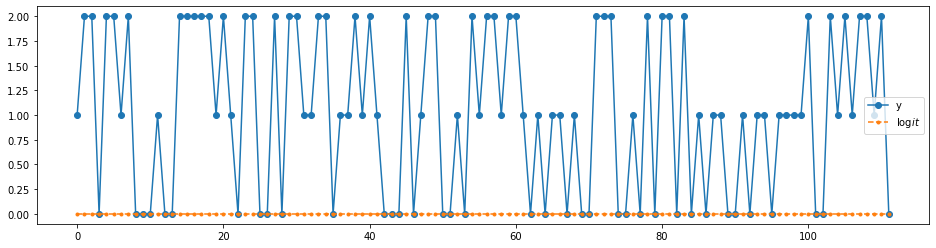

성능:  (0.979699225186024, 0.33035714285714285)


In [ ]:
model =SoftmaxRegressionGD(lr = 0.1)

model.init_weights(X_train, y_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **학습**

In [ ]:
history = model.fit(X_train, y_train, epochs=501)

### **학습 후 성능평가**

In [ ]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **테스트셋 성능평가**

In [ ]:
print('성능: ', model.evaluate(X_test, y_test))
model.draw_dflow(X_test, y_test, figsize=(16,4))

In [ ]:
model.draw_lcurve()